

---

##  Isometrias no Plano via Matrizes

### **Objetivo**

Explorar as principais **isometrias no plano**  — **rotação**, **reflexão**, **translação** e **composições** — utilizando **representações matriciais** e verificando suas propriedades geométricas por meio de código e visualização gráfica.

---



Considere o triângulo  $ABC$ , com vértices definidos por:

*  A = (1, 1)
*  B = (3, 1)
*  C = (2, 3)

Represente o triângulo como uma matriz, onde cada **coluna** é um ponto:


T=
$\begin{bmatrix}
1 & 3 & 2 \\
1 & 1 & 3
\end{bmatrix}$



 Escreva as **matrizes** das seguintes transformações:

   a) **Reflexão** em relação ao eixo $x$

   b) **Reflexão** em relação à reta $y = x$

   c) **Rotação** no sentido anti-horário em torno da origem por um ângulo genérico $\theta$ (em graus)

Dica: use a fórmula

  $R_\theta = $
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}

  

   d) **Translação** pelo vetor $\vec{v} = (2, -1)$

---

##  Aplicações Diretas

 Aplique **individualmente** cada transformação ao triângulo $T$, utilizando:

 Multiplicação de matrizes $T' = A \cdot T$, para isometrias lineares e soma vetorial $T' = A \cdot T + \vec{v}$, quando houver translação

 Visualize (graficamente) o triângulo original e cada triângulo transformado.

---
 Composição de Isometrias

 Considere a seguinte composição de transformações:

   * Primeiro: **rotação** de $\theta = 90^\circ$
   * Depois: **reflexão** no eixo $x$

   a) Escreva a **matriz composta** $M = R_x \cdot R_{90}$

   b) Aplique $M$ ao triângulo $T$ e visualize o resultado.

   c) Interprete geometricamente o efeito da transformação composta. O que ela faz com o triângulo?

 Escolha um valor arbitrário de $\theta$ (por exemplo, $45^\circ$) e repita os passos acima.



# Análise Geométrica

 Após cada isometria ou composição:

   a) As **distâncias** entre os vértices são preservadas?

   b) Os **ângulos** internos permanecem os mesmos?

   Justifique com código ou cálculo. Lembre-se: **isometrias preservam distâncias e ângulos**.

---

##  Desafio Extra

 Implemente uma função que recebe:

   * Um conjunto de pontos $P$
   * Um tipo de isometria
   * Parâmetros (ângulo, vetor de translação, etc.)

   E retorna a imagem transformada $P'$. Use essa função para aplicar sequências arbitrárias de transformações ao triângulo.


##  Matrizes úteis para referência

* **Reflexão sobre o eixo $x$:**
  
 $ R_x = $
  $\begin{bmatrix}
  1 & 0 \\
  0 & -1
  \end{bmatrix}
  $

* **Reflexão na reta $y = x$:**
 $
  R_{y=x} = $
  $\begin{bmatrix}
  0 & 1 \\
  1 & 0
  \end{bmatrix}
  $

* **Rotação de $\theta$ graus anti-horária:**
 $
  R_\theta =$
 $ \begin{bmatrix}
  \cos \theta & -\sin \theta \\
  \sin \theta & \cos \theta
  \end{bmatrix}
  $

* **Translação por vetor $\vec{v} = (a, b)$:**
  $
  T(\vec{x}) = \vec{x} + \vec{v}
  $



In [40]:
import numpy as np
import matplotlib.pyplot as plt

def plotar(T):
    x_coords = T[0, :]
    y_coords = T[1, :]
    x_plot = np.append(x_coords, x_coords[0])
    y_plot = np.append(y_coords, y_coords[0])

    plt.figure(figsize=(6, 6))
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    
    plt.plot(x_plot, y_plot, 'bo-')
    plt.grid(True)
    plt.show()
    
A = [1, 1]
B = [3, 1]
C = [2, 3]
T = np.array([A, B, C]).T

T

array([[1, 3, 2],
       [1, 1, 3]])

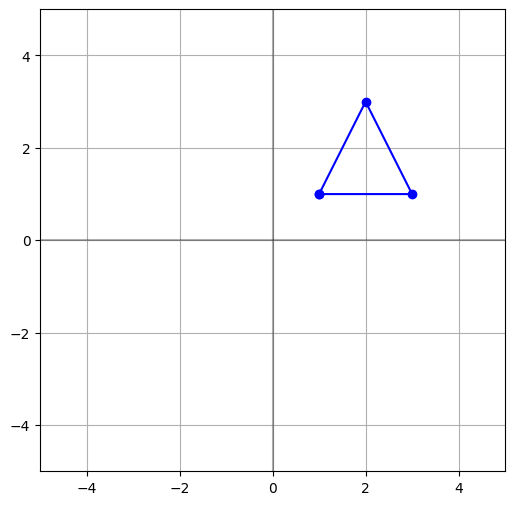

In [41]:
plotar(T)

In [4]:
# Reflexão no Eixo x
R_x = np.array([[1, 0],
                [0, -1]])

R_x @ T

array([[ 1,  3,  2],
       [-1, -1, -3]])

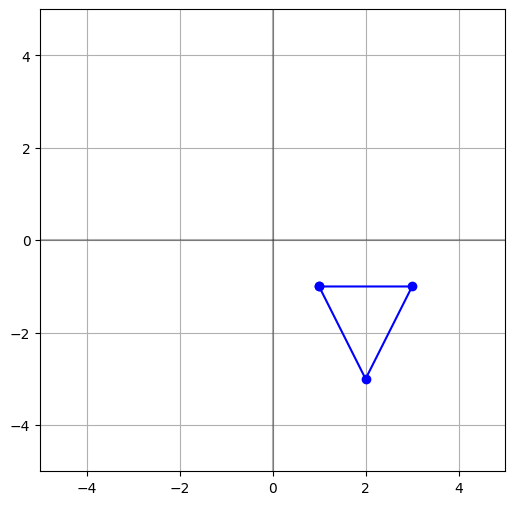

In [42]:
plotar(R_x @ T)

In [43]:
# Reflexão y = x
R_yx = np.array([[0, 1],
                 [1, 0]])

R_yx @ T

array([[1, 1, 3],
       [1, 3, 2]])

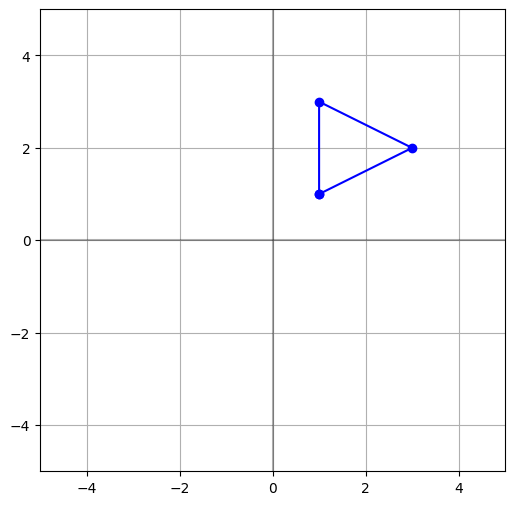

In [44]:
plotar(R_yx @ T)

In [ ]:
# Rotação antihorário
def R_theta(theta):
    return np.array([[np.cos(theta), -np.sin(theta)],
                     [np.sin(theta), np.cos(theta)]])

R_theta(np.pi) @ T

array([[-1., -3., -2.],
       [-1., -1., -3.]])

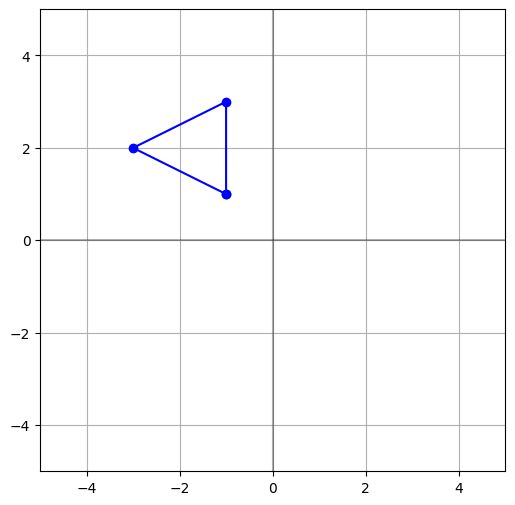

In [48]:
plotar(R_theta(np.pi/2) @ T)

In [56]:
# Translação pelo vetor v
v = np.array([2, -1])
T + v[:, np.newaxis]

array([[3, 5, 4],
       [0, 0, 2]])

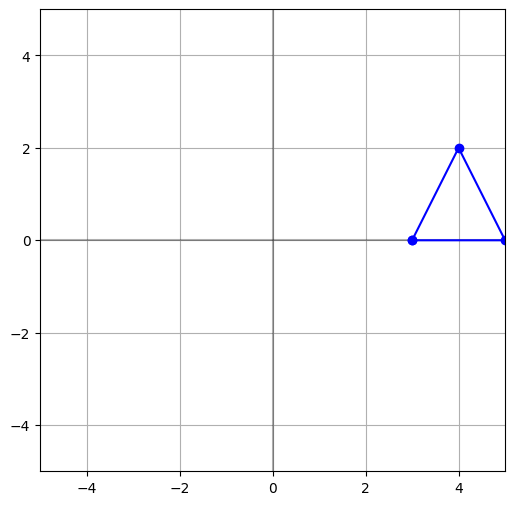

In [57]:
plotar(T + v[:, np.newaxis])

In [63]:
# Matriz composta
M = R_x @ R_theta(np.pi/2)
np.round(M, 2)

array([[ 0., -1.],
       [-1., -0.]])

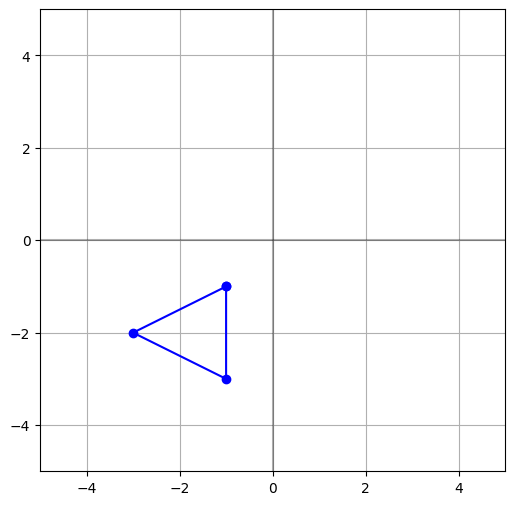

In [ ]:
plotar(M @ T)
# Conclusão: Composição de Isometrias geram isometrias

In [70]:
# Checando a preservação de distâncias e ângulos

def calcula_distancias(T):
    A, B, C = T[:, 0], T[:, 1], T[:, 2]
    AB = np.round(np.linalg.norm(A - B), 2)
    AC = np.round(np.linalg.norm(A - C), 2)
    CB = np.round(np.linalg.norm(C - B), 2)

    return AB, AC, CB

def calcula_angulos(T):
    A, B, C = T[:, 0], T[:, 1], T[:, 2]
    
    AB = B - A
    AC = C - A
    BA = A - B
    BC = C - B
    CA = A - C
    CB = B - C
    
    # Ângulos usando produto escalar
    angulo_A = np.round(np.degrees(np.arccos(np.dot(AB, AC) / (np.linalg.norm(AB) * np.linalg.norm(AC)))), 2)
    angulo_B = np.round(np.degrees(np.arccos(np.dot(BA, BC) / (np.linalg.norm(BA) * np.linalg.norm(BC)))), 2)
    angulo_C = np.round(np.degrees(np.arccos(np.dot(CA, CB) / (np.linalg.norm(CA) * np.linalg.norm(CB)))), 2)

    return angulo_A, angulo_B, angulo_C

distancias_originais = calcula_distancias(T)
angulos_originais = calcula_angulos(T)
for T_atual in [R_x @ T, R_yx @ T, R_theta(np.pi/4) @ T, T + v[:, np.newaxis]]:
    distancias_transformadas = calcula_distancias(T_atual)
    angulos_transformados = calcula_angulos(T_atual)

    if distancias_transformadas == distancias_originais:
        print('Distâncias Preservadas ✅')
    else:
        print('Distâncias NÃO preservadas ❌')
        print(distancias_originais, distancias_transformadas)

    if angulos_transformados == angulos_originais:
        print('Ângulos Preservados ✅')
    else:
        print('Ângulos NÃO Preservados ❌')
        print(angulos_originais, angulos_transformados)

Distâncias Preservadas ✅
Ângulos Preservados ✅
Distâncias Preservadas ✅
Ângulos Preservados ✅
Distâncias Preservadas ✅
Ângulos Preservados ✅
Distâncias Preservadas ✅
Ângulos Preservados ✅


In [71]:
def aplicar_isometria(P, tipo_isometria, **params):
    """
    Aplica uma isometria a um conjunto de pontos P
    
    Parâmetros:
    P: array 2xn com n pontos (cada coluna é um ponto)
    tipo_isometria: 'rotacao', 'reflexao_x', 'reflexao_y', 'reflexao_reta', 
                    'translacao', 'identidade', 'composta'
    **params: parâmetros específicos para cada isometria
    """
    
    # Converter para coordenadas homogêneas se necessário
    if P.shape[0] == 2:
        P_homogeneo = np.vstack([P, np.ones(P.shape[1])])
    else:
        P_homogeneo = P.copy()

    def _matriz_rotacao(angulo, centro=None, graus=True):
        """Matriz de rotação (ângulo em radianos ou graus)"""
        if graus:
            angulo = np.radians(angulo)
        
        R = np.array([
            [np.cos(angulo), -np.sin(angulo), 0],
            [np.sin(angulo), np.cos(angulo), 0],
            [0, 0, 1]
        ])
    
        # Se centro especificado, fazer rotação em torno do centro
        if centro is not None:
            cx, cy = centro
            T1 = np.array([[1, 0, -cx], [0, 1, -cy], [0, 0, 1]])  # Translação para origem
            T2 = np.array([[1, 0, cx], [0, 1, cy], [0, 0, 1]])    # Translação de volta
            R = T2 @ R @ T1
        
        return R

    def _matriz_reflexao_x():
        """Reflexão no eixo x"""
        return np.array([[1, 0, 0], [0, -1, 0], [0, 0, 1]])

    def _matriz_reflexao_y():
        """Reflexão no eixo y"""
        return np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])

    def _matriz_reflexao_reta(reta='y=x'):
        """Reflexão em relação a uma reta"""
        if reta == 'y=x':
            return np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
        elif reta == 'y=-x':
            return np.array([[0, -1, 0], [-1, 0, 0], [0, 0, 1]])
        else:
            raise ValueError(f"Reta não reconhecida: {reta}")

    def _matriz_translacao(vetor):
        """Translação por um vetor"""
        dx, dy = vetor
        return np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])

    def _matriz_composta(transformacoes):
        """Composição de múltiplas transformações"""
        M = np.eye(3)
        for transformacao in transformacoes:
            M = transformacao @ M
        return M
    
    # Matriz de transformação
    if tipo_isometria == 'rotacao':
        M = _matriz_rotacao(**params)
    elif tipo_isometria == 'reflexao_x':
        M = _matriz_reflexao_x()
    elif tipo_isometria == 'reflexao_y':
        M = _matriz_reflexao_y()
    elif tipo_isometria == 'reflexao_reta':
        M = _matriz_reflexao_reta(**params)
    elif tipo_isometria == 'translacao':
        M = _matriz_translacao(**params)
    elif tipo_isometria == 'identidade':
        M = np.eye(3)
    elif tipo_isometria == 'composta':
        M = _matriz_composta(**params)
    else:
        raise ValueError(f"Tipo de isometria não reconhecido: {tipo_isometria}")
    
    # Aplicar transformação
    P_transformado_h = M @ P_homogeneo
    
    # Converter de volta para coordenadas cartesianas se necessário
    if P.shape[0] == 2:
        return P_transformado_h[:2, :]
    else:
        return P_transformado_h

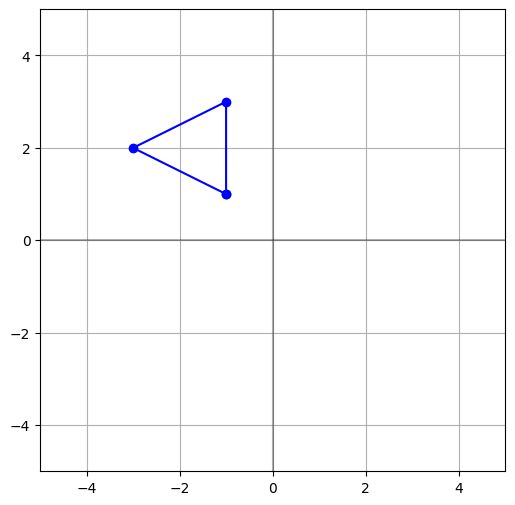

In [74]:
plotar(aplicar_isometria(T, 'rotacao', angulo=90))